In [1]:
import os
import re
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report
import ipyplot

In [2]:
data = []
sub = []
with open("./data/txt/CK+_10-fold_sample_IDascendorder_step10.txt", "r") as f:
    for line in f:
        if re.match(r"S", line):
            sub.append(line.strip())
        else:
            data.append(sub)
            sub = []
    data.append(sub)
data = data[1:]


fold1-10

In [3]:
data

[['S130/007 Angry',
  'S501/001 Angry',
  'S147/002 Contempt',
  'S005/001 Disgust',
  'S035/005 Disgust',
  'S054/004 Disgust',
  'S074/004 Disgust',
  'S106/004 Disgust',
  'S116/006 Disgust',
  'S130/012 Disgust',
  'S054/002 Fear',
  'S074/001 Fear',
  'S084/002 Fear',
  'S501/004 Fear',
  'S035/006 Happy',
  'S064/003 Happy',
  'S074/005 Happy',
  'S094/004 Happy',
  'S106/006 Happy',
  'S116/007 Happy',
  'S130/013 Happy',
  'S064/004 Sad',
  'S106/002 Sad',
  'S130/009 Sad',
  'S501/006 Sad',
  'S035/001 Surprise',
  'S054/003 Surprise',
  'S064/001 Surprise',
  'S074/002 Surprise',
  'S084/001 Surprise',
  'S094/001 Surprise',
  'S116/001 Surprise',
  'S130/001 Surprise'],
 ['S010/004 Angry',
  'S037/003 Angry',
  'S055/004 Angry',
  'S075/008 Angry',
  'S117/006 Angry',
  'S502/001 Angry',
  'S148/002 Contempt',
  'S502/002 Contempt',
  'S055/003 Disgust',
  'S065/005 Disgust',
  'S075/005 Disgust',
  'S085/004 Disgust',
  'S095/006 Disgust',
  'S107/005 Disgust',
  'S131/010 

In [4]:
ck = {0: 'Happy', 1: 'Angry', 2: 'Disgust', 3: 'Fear', 4: 'Sad', 5: 'Contempt', 6: 'Surprise'}
listvalue = list(ck.values())
listvalue

['Happy', 'Angry', 'Disgust', 'Fear', 'Sad', 'Contempt', 'Surprise']

# Fold 1

## data

In [5]:
datafold1 = data[0]
datafold1

['S130/007 Angry',
 'S501/001 Angry',
 'S147/002 Contempt',
 'S005/001 Disgust',
 'S035/005 Disgust',
 'S054/004 Disgust',
 'S074/004 Disgust',
 'S106/004 Disgust',
 'S116/006 Disgust',
 'S130/012 Disgust',
 'S054/002 Fear',
 'S074/001 Fear',
 'S084/002 Fear',
 'S501/004 Fear',
 'S035/006 Happy',
 'S064/003 Happy',
 'S074/005 Happy',
 'S094/004 Happy',
 'S106/006 Happy',
 'S116/007 Happy',
 'S130/013 Happy',
 'S064/004 Sad',
 'S106/002 Sad',
 'S130/009 Sad',
 'S501/006 Sad',
 'S035/001 Surprise',
 'S054/003 Surprise',
 'S064/001 Surprise',
 'S074/002 Surprise',
 'S084/001 Surprise',
 'S094/001 Surprise',
 'S116/001 Surprise',
 'S130/001 Surprise']

In [7]:
dest1 = "./log/lossfold1/"
losslist1 = []
for file in os.listdir(dest1):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist1.append(file)


losslist

In [8]:
losslist1

['cktrain_loss_fold1-1fan_ckplus_date_25-Feb-2024-14-31-40.txt',
 'cktrain_loss_fold1-2fan_ckplus_date_25-Feb-2024-16-02-40.txt',
 'cktrain_loss_fold1-3fan_ckplus_date_25-Feb-2024-17-36-31.txt']

In [9]:
subdest1 = "./log/lossfold1/eval/"
evallist1 = []
for file in os.listdir(subdest1):
    evallist1.append(file)

evallist

In [10]:
evallist1

['1-1evalfan_ckplus_date_26-Feb-2024-04-02-16.txt',
 '1-2evalfan_ckplus_date_26-Feb-2024-04-06-03.txt',
 '1-3evalfan_ckplus_date_26-Feb-2024-04-07-41.txt']

## 1-1

In [11]:
eval1_1 = evallist1[0]

In [12]:
fold_1_1 = losslist1[0]
epochs1_1 = []
train_loss1_1 = []
val_loss1_1 = []
with open(dest1 + fold_1_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs1_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss1_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss1_1.append(float(temp[0]))
print(epochs1_1)
print(train_loss1_1)
print(val_loss1_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4606, 0.0643, 0.0233, 0.0196, 0.0282, 0.0383, 0.0174, 0.0084, 0.001, 0.0004, 0.0003, 0.0001, 0.0017, 0.0041, 0.0091, 0.0099, 0.0101, 0.0211, 0.015, 0.0131, 0.003, 0.0058, 0.0055, 0.0089, 0.0373, 0.0029, 0.0006, 0.0029, 0.0017, 0.0021, 0.0004, 0.0016, 0.0004, 0.0004, 0.0003, 0.0003, 0.0006, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0003, 0.0001, 0.0022, 0.0002, 0.0002, 0.0002, 0.0002]
[39.9287, 42.563, 259.0895, 37.7843, 1001.6343, 107.0408, 256.7259, 48.6072, 55.5541, 62.6001, 69.4003, 55.4776, 24.7448, 66.8622, 29.2672, 54.0211, 14.0202, 15.7445, 76.4104, 13.4369, 41.0376, 50.8602, 15.19, 48.0234, 63.5125, 90.0263, 48.0173, 10.266, 14.5717, 34.2025, 49.5763, 25.183, 46

In [13]:
label_1_1 = []
pred_1_1 = []
with open(subdest1 + eval1_1, "r") as f:
    for line in f:
        if re.match(r"L", line):
            temp = line.strip().split(", ")
            label_1_1.append(temp[0][-1])
            pred_1_1.append(temp[1][-1])
        

### prediction report

In [14]:
for i in range(len(datafold1)):
    label = int(label_1_1[i])
    pred = int(pred_1_1[i])
    tf = label == pred
    if not tf:
        print(f'{datafold1[i]}, Label: {label} ({listvalue[label]}), Pred: {pred} ({listvalue[pred]}), Correct: {tf}')
        name = datafold1[i].split()[0]
        dir_path = "./data/face/ck_face/"+name # Get the path to the directory
        image_files = os.listdir(dir_path)  # Get a list of all image files in the directory
        image_files = [os.path.join(dir_path, f) for f in image_files]
        ipyplot.plot_images(image_files, img_width=100)

S064/004 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


S130/009 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


### classification report

In [15]:
print("Fold1-1")
print(classification_report(label_1_1, pred_1_1, target_names=listvalue))

Fold1-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         7
       Angry       0.50      1.00      0.67         2
     Disgust       1.00      1.00      1.00         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      0.50      0.67         4
    Contempt       1.00      1.00      1.00         1
    Surprise       1.00      1.00      1.00         8

    accuracy                           0.94        33
   macro avg       0.93      0.93      0.90        33
weighted avg       0.97      0.94      0.94        33



## 1-2

In [16]:
eval1_2 = evallist1[1]
eval1_2

'1-2evalfan_ckplus_date_26-Feb-2024-04-06-03.txt'

In [17]:
losslist1[1]

'cktrain_loss_fold1-2fan_ckplus_date_25-Feb-2024-16-02-40.txt'

In [18]:
fold_1_2 = losslist1[1]
epochs1_2 = []
train_loss1_2 = []
val_loss1_2 = []
with open(dest1 + fold_1_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs1_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss1_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss1_2.append(float(temp[0]))
print(epochs1_2)
print(train_loss1_2)
print(val_loss1_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4687, 0.0836, 0.0416, 0.0193, 0.0213, 0.0161, 0.0073, 0.0011, 0.0138, 0.0043, 0.0118, 0.0061, 0.0132, 0.0012, 0.0002, 0.0008, 0.0066, 0.0018, 0.0006, 0.0003, 0.0002, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
[41.0272, 57.1271, 177.421, 36.5722, 229.61, 72.2917, 292.691, 221.4581, 46.6955, 36.2167, 37.9902, 49.1642, 31.5688, 125.2156, 95.9149, 65.7755, 452.6973, 278.9622, 115.7521, 285.0726, 140.6351, 211.9108, 77.5646, 116.9599, 83.2063, 61.6663, 44.0725, 36.1597, 43.3934, 42.7086, 85.6387, 

In [19]:
label_1_2 = []
pred_1_2 = []
with open(subdest1 + eval1_2, "r") as f:
    for line in f:
        if re.match(r"L", line):
            temp = line.strip().split(", ")
            label_1_2.append(temp[0][-1])
            pred_1_2.append(temp[1][-1])

### prediction report

In [20]:
for i in range(len(datafold1)):
    label = int(label_1_2[i])
    pred = int(pred_1_2[i])
    tf = label == pred
    if not tf:
        print(f'{datafold1[i]}, Label: {label} ({listvalue[label]}), Pred: {pred} ({listvalue[pred]}), Correct: {tf}')
        name = datafold1[i].split()[0]
        dir_path = "./data/face/ck_face/"+name # Get the path to the directory
        image_files = os.listdir(dir_path)  # Get a list of all image files in the directory
        image_files = [os.path.join(dir_path, f) for f in image_files]
        ipyplot.plot_images(image_files, img_width=100)

S147/002 Contempt, Label: 5 (Contempt), Pred: 3 (Fear), Correct: False


S064/004 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


S130/009 Sad, Label: 4 (Sad), Pred: 2 (Disgust), Correct: False


### classification report

In [22]:
print("Fold1-2")
print(classification_report(label_1_2, pred_1_2, target_names=listvalue))

Fold1-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         7
       Angry       0.67      1.00      0.80         2
     Disgust       0.88      1.00      0.93         7
        Fear       0.80      1.00      0.89         4
         Sad       1.00      0.50      0.67         4
    Contempt       0.00      0.00      0.00         1
    Surprise       1.00      1.00      1.00         8

    accuracy                           0.91        33
   macro avg       0.76      0.79      0.76        33
weighted avg       0.90      0.91      0.89        33



c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1-3

In [23]:
eval1_3 = evallist1[2]
eval1_3

'1-3evalfan_ckplus_date_26-Feb-2024-04-07-41.txt'

In [24]:
losslist1[2]

'cktrain_loss_fold1-3fan_ckplus_date_25-Feb-2024-17-36-31.txt'

In [25]:
fold_1_3 = losslist1[2]
epochs1_3 = []
train_loss1_3 = []
val_loss1_3 = []
with open(dest1 + fold_1_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs1_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss1_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss1_3.append(float(temp[0]))
print(epochs1_3)
print(train_loss1_3)
print(val_loss1_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4425, 0.082, 0.0329, 0.027, 0.0172, 0.0231, 0.0186, 0.0016, 0.0014, 0.0006, 0.0008, 0.0026, 0.0004, 0.0003, 0.0008, 0.0031, 0.0036, 0.0156, 0.0152, 0.0063, 0.0004, 0.0018, 0.0004, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0006, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
[11.0393, 12.4249, 14.0351, 20.9514, 11.5979, 42.035, 6.1677, 18.7848, 30.194, 16.6599, 21.0128, 40.431, 26.2893, 37.5692, 28.8265, 26.4234, 34.8903, 25.0189, 6.9365, 6.1551, 9.7158, 13.3409, 11.7369, 12.7104, 13.6216, 13.6938, 14.552, 11.8678, 12.6502, 12.4441, 12.992, 10.2978, 11.477, 12

In [27]:
label_1_3 = []
pred_1_3 = []
with open(subdest1 + eval1_3, "r") as f:
    for line in f:
        if re.match(r"L", line):
            temp = line.strip().split(", ")
            label_1_3.append(temp[0][-1])
            pred_1_3.append(temp[1][-1])

### prediction report

In [28]:
for i in range(len(datafold1)):
    label = int(label_1_3[i])
    pred = int(pred_1_3[i])
    tf = label == pred
    if not tf:
        print(f'{datafold1[i]}, Label: {label} ({listvalue[label]}), Pred: {pred} ({listvalue[pred]}), Correct: {tf}')
        name = datafold1[i].split()[0]
        dir_path = "./data/face/ck_face/"+name # Get the path to the directory
        image_files = os.listdir(dir_path)  # Get a list of all image files in the directory
        image_files = [os.path.join(dir_path, f) for f in image_files]
        ipyplot.plot_images(image_files, img_width=100)

S064/004 Sad, Label: 4 (Sad), Pred: 2 (Disgust), Correct: False


S130/009 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


### classification report

In [32]:
print("Fold1-3")
print(classification_report(label_1_3, pred_1_3, target_names=listvalue))

Fold1-3
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         7
       Angry       0.67      1.00      0.80         2
     Disgust       0.88      1.00      0.93         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      0.50      0.67         4
    Contempt       1.00      1.00      1.00         1
    Surprise       1.00      1.00      1.00         8

    accuracy                           0.94        33
   macro avg       0.93      0.93      0.91        33
weighted avg       0.95      0.94      0.93        33



## loss

Fold1-1


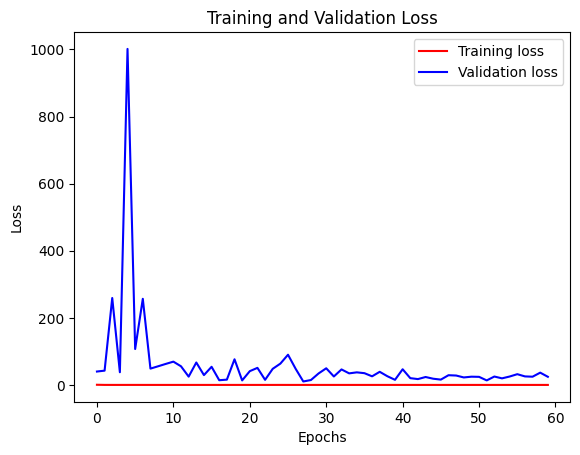

Fold1-2


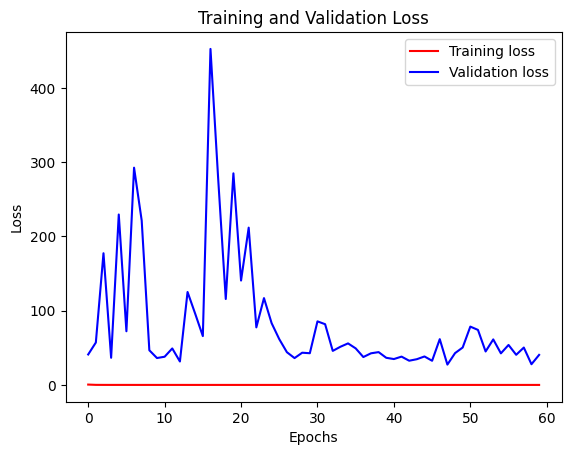

Fold1-3


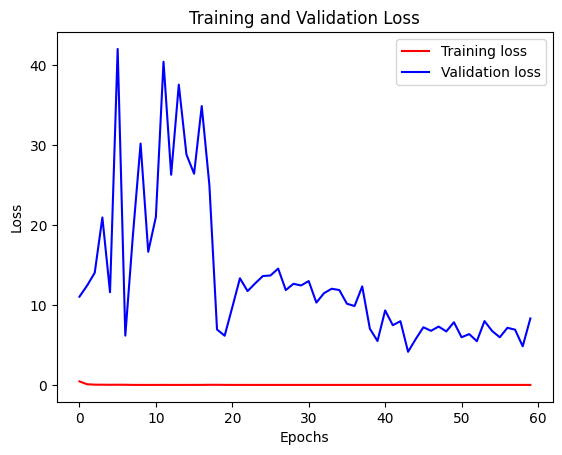

In [29]:
print("Fold1-1")
plt.plot(epochs1_1, train_loss1_1, 'r', label='Training loss')
plt.plot(epochs1_1, val_loss1_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold1-2")
plt.plot(epochs1_2, train_loss1_2, 'r', label='Training loss')
plt.plot(epochs1_2, val_loss1_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold1-3")
plt.plot(epochs1_3, train_loss1_3, 'r', label='Training loss')
plt.plot(epochs1_3, val_loss1_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 2

## data

In [33]:
datafold2 = data[1]
datafold2

['S010/004 Angry',
 'S037/003 Angry',
 'S055/004 Angry',
 'S075/008 Angry',
 'S117/006 Angry',
 'S502/001 Angry',
 'S148/002 Contempt',
 'S502/002 Contempt',
 'S055/003 Disgust',
 'S065/005 Disgust',
 'S075/005 Disgust',
 'S085/004 Disgust',
 'S095/006 Disgust',
 'S107/005 Disgust',
 'S131/010 Disgust',
 'S055/006 Fear',
 'S065/002 Fear',
 'S117/003 Fear',
 'S502/004 Fear',
 'S010/006 Happy',
 'S037/006 Happy',
 'S055/005 Happy',
 'S065/004 Happy',
 'S075/006 Happy',
 'S085/002 Happy',
 'S095/007 Happy',
 'S131/006 Happy',
 'S095/010 Sad',
 'S131/003 Sad',
 'S010/002 Surprise',
 'S037/001 Surprise',
 'S055/001 Surprise',
 'S065/003 Surprise',
 'S075/002 Surprise',
 'S085/003 Surprise',
 'S095/001 Surprise',
 'S107/001 Surprise',
 'S117/001 Surprise',
 'S131/001 Surprise']

In [35]:
dest2 = "./log/lossfold2/"
losslist2 = []
for file in os.listdir(dest2):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist2.append(file)


lostlist

In [36]:
losslist2

['cktrain_loss_fold2-1fan_ckplus_date_25-Feb-2024-09-36-51.txt',
 'cktrain_loss_fold2-2fan_ckplus_date_25-Feb-2024-11-16-21.txt',
 'cktrain_loss_fold2-3fan_ckplus_date_25-Feb-2024-12-55-02.txt']

In [37]:
subdest2 = "./log/lossfold2/eval/"
evallist2 = []
for file in os.listdir(subdest2):
    evallist2.append(file)

evallist

In [38]:
evallist2

['2-1evalfan_ckplus_date_26-Feb-2024-04-51-56.txt',
 '2-2evalfan_ckplus_date_26-Feb-2024-04-53-02.txt',
 '2-3evalfan_ckplus_date_26-Feb-2024-04-53-58.txt']

## 2-1

In [39]:
eval2_1 = evallist2[0]

In [41]:
fold_2_1 = losslist2[0]
epochs2_1 = []
train_loss2_1 = []
val_loss2_1 = []
with open(dest2 + fold_2_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs2_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss2_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss2_1.append(float(temp[0]))
print(epochs2_1)
print(train_loss2_1)
print(val_loss2_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4216, 0.0614, 0.0663, 0.0434, 0.0205, 0.0282, 0.0168, 0.0032, 0.0007, 0.0029, 0.0003, 0.0002, 0.0005, 0.0014, 0.0134, 0.0027, 0.0004, 0.0003, 0.0002, 0.0083, 0.0009, 0.0003, 0.0003, 0.0002, 0.0003, 0.0002, 0.0001, 0.0003, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0003, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002]
[25.1432, 52.1538, 3057.6531, 107.9262, 14.7295, 27.2592, 19.0911, 98.1717, 43.8522, 138.3171, 121.504, 51.6302, 35.0472, 52.8127, 42.6976, 9.8805, 11.9454, 1.8306, 7.9346, 29.0169, 19.9104, 8.248, 10.6002, 8.2119, 10.9782, 2.3536, 5.3923, 16.463, 15.1465, 7.6993, 12.3812, 9.8206, 9.1304

In [42]:
label_2_1 = []
pred_2_1 = []
with open(subdest2 + eval2_1, "r") as f:
    for line in f:
        if re.match(r"L", line):
            temp = line.strip().split(", ")
            label_2_1.append(temp[0][-1])
            pred_2_1.append(temp[1][-1])
        

### prediction report

In [43]:
for i in range(len(datafold2)):
    label = int(label_2_1[i])
    pred = int(pred_2_1[i])
    tf = label == pred
    if not tf:
        print(f'{datafold2[i]}, Label: {label} ({listvalue[label]}), Pred: {pred} ({listvalue[pred]}), Correct: {tf}')
        name = datafold2[i].split()[0]
        dir_path = "./data/face/ck_face/"+name # Get the path to the directory
        image_files = os.listdir(dir_path)  # Get a list of all image files in the directory
        image_files = [os.path.join(dir_path, f) for f in image_files]
        ipyplot.plot_images(image_files, img_width=100)

S131/010 Disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False


### classification report

In [44]:
print("Fold2-1")
print(classification_report(label_2_1, pred_2_1, target_names=listvalue))

Fold2-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       0.86      1.00      0.92         6
     Disgust       1.00      0.86      0.92         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00        10

    accuracy                           0.97        39
   macro avg       0.98      0.98      0.98        39
weighted avg       0.98      0.97      0.97        39



## 2-2

In [52]:
eval2_2 = evallist2[1]
eval2_2

'2-2evalfan_ckplus_date_26-Feb-2024-04-53-02.txt'

In [47]:
losslist2[1]

'cktrain_loss_fold2-2fan_ckplus_date_25-Feb-2024-11-16-21.txt'

In [48]:
fold_2_2 = losslist2[1]
epochs2_2 = []
train_loss2_2 = []
val_loss2_2 = []
with open(dest2 + fold_2_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs2_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss2_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss2_2.append(float(temp[0]))
print(epochs2_2)
print(train_loss2_2)
print(val_loss2_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4692, 0.064, 0.0385, 0.0042, 0.0015, 0.0221, 0.0027, 0.0003, 0.0002, 0.0002, 0.0003, 0.0001, 0.0001, 0.0002, 0.0009, 0.0049, 0.0062, 0.0144, 0.0052, 0.0004, 0.0002, 0.0002, 0.0002, 0.0002, 0.003, 0.0242, 0.002, 0.0003, 0.0002, 0.0002, 0.0003, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0004, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0009, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001]
[2.7493, 56.0628, 766.5536, 3347.0039, 293.3301, 0.3945, 1.9746, 1.459, 1.2925, 2.3809, 4.1087, 2.6197, 4.557, 1.5024, 0.0, 4.9954, 12.8237, 6.9992, 6.9951, 3.9152, 5.7283, 8.6303, 5.9983, 5.1957, 4.4979, 0.4013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [49]:
label_2_2 = []
pred_2_2 = []
with open(subdest2 + eval2_2, "r") as f:
    for line in f:
        if re.match(r"L", line):
            temp = line.strip().split(", ")
            label_2_2.append(temp[0][-1])
            pred_2_2.append(temp[1][-1])

### prediction report

In [50]:
for i in range(len(datafold2)):
    label = int(label_2_2[i])
    pred = int(pred_2_2[i])
    tf = label == pred
    if not tf:
        print(f'{datafold2[i]}, Label: {label} ({listvalue[label]}), Pred: {pred} ({listvalue[pred]}), Correct: {tf}')
        name = datafold2[i].split()[0]
        dir_path = "./data/face/ck_face/"+name # Get the path to the directory
        image_files = os.listdir(dir_path)  # Get a list of all image files in the directory
        image_files = [os.path.join(dir_path, f) for f in image_files]
        ipyplot.plot_images(image_files, img_width=100)

### classification report

In [51]:
print("Fold2-2")
print(classification_report(label_2_2, pred_2_2, target_names=listvalue))

Fold2-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       1.00      1.00      1.00         6
     Disgust       1.00      1.00      1.00         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00        10

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



## 2-3

In [53]:
eval2_3 = evallist2[2]
eval2_3

'2-3evalfan_ckplus_date_26-Feb-2024-04-53-58.txt'

In [54]:
losslist2[2]

'cktrain_loss_fold2-3fan_ckplus_date_25-Feb-2024-12-55-02.txt'

In [55]:
fold_2_3 = losslist2[2]
epochs2_3 = []
train_loss2_3 = []
val_loss2_3 = []
with open(dest2 + fold_2_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs2_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss2_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss2_3.append(float(temp[0]))
print(epochs2_3)
print(train_loss2_3)
print(val_loss2_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4797, 0.089, 0.0179, 0.0174, 0.0061, 0.0012, 0.0007, 0.0036, 0.0041, 0.0053, 0.0003, 0.0003, 0.0028, 0.0013, 0.005, 0.0038, 0.0242, 0.0123, 0.0026, 0.0003, 0.0003, 0.0003, 0.0002, 0.0003, 0.0018, 0.0038, 0.0065, 0.0005, 0.0003, 0.001, 0.0003, 0.0002, 0.0004, 0.0002, 0.0002, 0.0003, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
[17.3247, 5792.8945, 7437.2451, 5211.6079, 10639.0234, 7555.73, 5471.8667, 2121.8079, 31.8098, 0.0, 92.4616, 72.7501, 38.048, 338.8694, 236.6143, 1951.7646, 0.0, 25.104, 6.6077, 2.1803, 4.473, 0.9868, 2.1496, 13.5586, 47.5696, 37.3689, 84.7369, 62.48, 63.4991, 35.8915, 42.2727, 23.5863, 40.

In [56]:
label_2_3 = []
pred_2_3 = []
with open(subdest2 + eval2_3, "r") as f:
    for line in f:
        if re.match(r"L", line):
            temp = line.strip().split(", ")
            label_2_3.append(temp[0][-1])
            pred_2_3.append(temp[1][-1])

### prediction report

In [57]:
for i in range(len(datafold2)):
    label = int(label_2_3[i])
    pred = int(pred_2_3[i])
    tf = label == pred
    if not tf:
        print(f'{datafold2[i]}, Label: {label} ({listvalue[label]}), Pred: {pred} ({listvalue[pred]}), Correct: {tf}')
        name = datafold2[i].split()[0]
        dir_path = "./data/face/ck_face/"+name # Get the path to the directory
        image_files = os.listdir(dir_path)  # Get a list of all image files in the directory
        image_files = [os.path.join(dir_path, f) for f in image_files]
        ipyplot.plot_images(image_files, img_width=100)

### classification report

In [58]:
print("Fold2-3")
print(classification_report(label_2_3, pred_2_3, target_names=listvalue))

Fold2-3
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       1.00      1.00      1.00         6
     Disgust       1.00      1.00      1.00         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00        10

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



## loss

Fold2-1


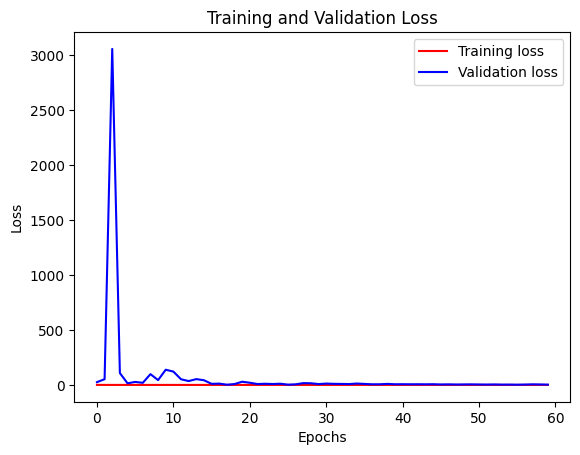

Fold2-2


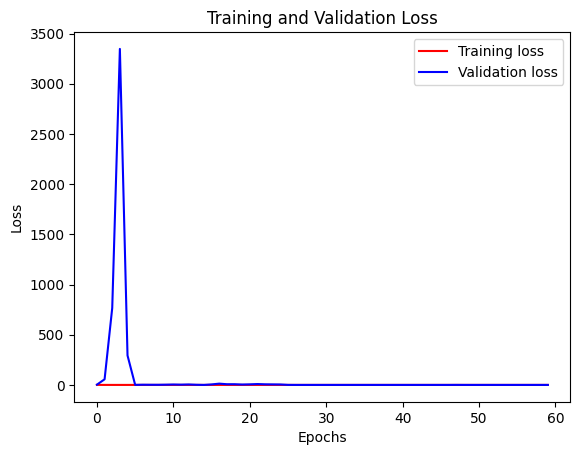

Fold2-3


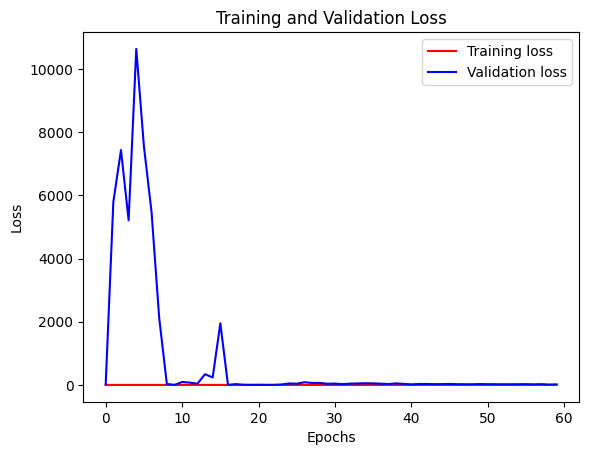

In [59]:
print("Fold2-1")
plt.plot(epochs2_1, train_loss2_1, 'r', label='Training loss')
plt.plot(epochs2_1, val_loss2_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold2-2")
plt.plot(epochs2_2, train_loss2_2, 'r', label='Training loss')
plt.plot(epochs2_2, val_loss2_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold2-3")
plt.plot(epochs2_3, train_loss2_3, 'r', label='Training loss')
plt.plot(epochs2_3, val_loss2_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()